In [1]:
import numpy as np
import gym
import random 
import time
from IPython.display import clear_output


In [3]:
env= gym.make('FrozenLake-v1')

In [5]:
action_space_size= env.action_space.n
state_space_size= env.observation_space.n

q_table=np.zeros((state_space_size,action_space_size))
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
num_epochs=10000
max_steps_in_epoch=100

alpha=0.1 	#learing rate
gamma=0.99 	#discount rate

epsilon=1	#exploration_rate
max_exploration_r=1
min_exploration_r=0.01
exploration_decay=0.001

In [22]:
rewards_epochs=[]
Rewards=np.zeros((1))

for epoch in range(num_epochs):
	state,info=env.reset()

	done = False
	current_reward=0

	for step in range(max_steps_in_epoch):
		#print(epoch,step)
		exploration=random.uniform(0,1)

		if exploration>epsilon:
			action=np.argmax(q_table[state,:])
		else:
			action = env.action_space.sample()

		new_state,reward,done,truncated,info=env.step(action)
		q_table[state,action]= (1-alpha)*q_table[state,action]+alpha*(reward+gamma*np.max(q_table[new_state,:]))
		state=new_state
		current_reward+=reward


		if done:
			break
	Rewards=np.hstack((Rewards,current_reward))
	epsilon=min_exploration_r+(max_exploration_r-min_exploration_r)*np.exp(-exploration_decay*epoch)
	rewards_epochs.append(current_reward)
	print(epoch,current_reward)


0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 1.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 1.0
100 0.0
101 0.0
102 0.0
103 0.0
104 1.0
105 0.0
106 1.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 0.

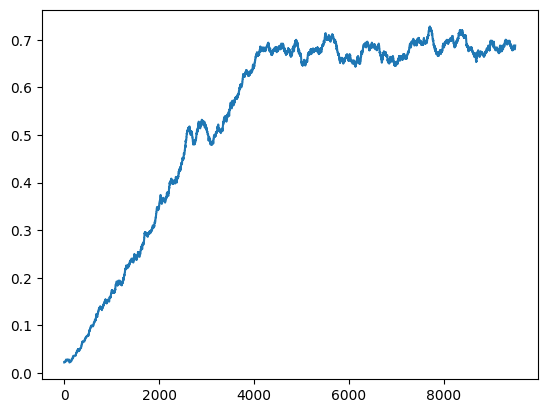

In [26]:
import matplotlib.pylab as plt

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

plt.plot(moving_average(Rewards,500))